In [3]:
import sys
for path in sys.path:
    print(path)
    


E:\Anaconda3\python36.zip
E:\Anaconda3\DLLs
E:\Anaconda3\lib
E:\Anaconda3
E:\Anaconda3\lib\site-packages
E:\Anaconda3\lib\site-packages\mujoco_py-2.0.2.5-py3.6.egg
c:\users\home\gym
c:\users\home\rl-starter-files-master\torch-ac
c:\users\home\gym-gridworld
E:\Anaconda3\lib\site-packages\gym_gridworlds-0.0.2-py3.6.egg
E:\Anaconda3\lib\site-packages\win32
E:\Anaconda3\lib\site-packages\win32\lib
E:\Anaconda3\lib\site-packages\Pythonwin
E:\Anaconda3\lib\site-packages\IPython\extensions
C:\Users\Home\.ipython


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import animation, rc
%matplotlib inline
from IPython.display import HTML
from random import randint
from scipy import stats
from collections import deque
plt.rcParams.update({'font.size': 18})
from IPython.display import clear_output
from gridworld import * 
from IPython.display import Video
import matplotlib as mpl
plt.rcParams['figure.figsize'] = [15, 11]
mpl.rcParams['animation.convert_path'] = r'/usr/bin/convert'

In [5]:
np.random.seed(1234)
def map_(x, in_min, in_max, out_min, out_max):
    return (x - in_min) * (out_max - out_min) / (in_max - in_min) + out_min;


In [6]:
env = gridworld()
env.show_grid()

---------------------
| S  |    |    |    |  
---------------------
|    |    |    |    |  
---------------------
|    |    | T  |    |  
---------------------
|    |    |    | G  |  
---------------------


In [7]:
q_table = np.zeros((env.dim[0], env.dim[1], len(env.action_space)))
q_table.shape

(4, 4, 8)

In [18]:
# Parameters
num_episodes = 600
gamma = 0.99
eps = 0.05
lr = 0.01

In [17]:
we=0
for sa in range(5):
    for sb in range(5):
        for a in range(4):
            we +=1
            #print(q_table[sa]`[sb][a])


## Calculating Q Table 

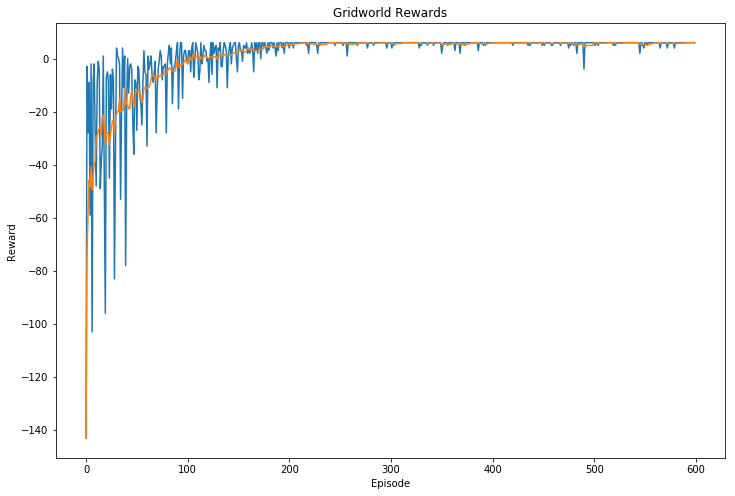

In [23]:
ep_rewards = []
n_steps = []

q_table = np.zeros((env.dim[0], env.dim[1], len(env.action_space)))

for ep in range(num_episodes):
    data = env.reset()
    s_0 = data[0]
    done = False
    rewards = 0
    while done == False:
        if np.random.rand() < eps:                            
            # Random Action 5% of the time
            action = np.random.choice(env.action_space)      
        else:
            # Deterministic Action- max q value
            action = np.argmax(q_table[s_0[0], s_0[1]])       
            
        s_1, reward, done = env.step(action)
        
        q_table[s_0[0], s_0[1], action] += lr*(reward + \
                                               gamma*np.max(q_table[s_1[0], s_1[1]]) \
                                               - q_table[s_0[0], s_0[1], action])
        
        s_0 = s_1.copy()
        rewards += reward
        if done:
            ep_rewards.append(rewards)
            
# rolling average
mean_rewards = [np.mean(ep_rewards[n-10:n]) if n > 10 else np.mean(ep_rewards[:n]) 
               for n in range(1, len(ep_rewards))]

# Plot results
plt.figure(figsize=(12,8))
plt.plot(ep_rewards)
plt.plot(mean_rewards)
plt.title('Gridworld Rewards')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()

### Optimal Actions 
Based on Max Q values using the Trained Qtable

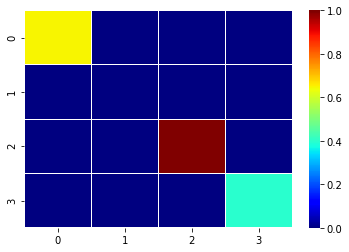

In [24]:
o=0
table__={}
num_episodes = 1
dim = data[2]
pos_goal = data[1]
pos_trap = data[3]
table = np.zeros(dim)
table[pos_goal[0],pos_goal[1]] = 0.4
table[pos_trap[0],pos_trap[1]] = 1.0
for ep in range(num_episodes):
    data = env.reset()
    s_0 = data[0]
    done = False
    rewards = 0
    while done == False:
        action = np.argmax(q_table[s_0[0], s_0[1]])       # Deterministic Action- max q value
        if(s_0==pos_goal):
            table[s_0[0], s_0[1]] = .65
        else:
            table[s_0[0], s_0[1]] = .65
        table__[str(o)] = table.copy()
        o = o + 1
        table[s_0[0], s_0[1]] = 0.0
        s_1, reward, done = env.step(action)
        rewards += reward
        if done:
            ep_rewards.append(rewards)

# Animation part 
def update_frame(i):
    plt.clf()
    heatmap_data = table__[str(i)]
    ax = sns.heatmap(
        heatmap_data,
        annot=False,
        cmap='jet',
        linewidths=.05,
        fmt='')

fig = plt.figure()
data_min = np.nanmin(table__.values)
data_max = np.nanmax(table__.values)
data_frames_iterator = table__.values()
# write animation frames
anim = animation.FuncAnimation(fig, update_frame, frames=len(table__), interval=100)
# anim.save('test.gif', writer='imagemagick')
HTML(anim.to_html5_video())

### Random Actions until Game Over 

In [25]:
a = np.empty((0, 2))
a = np.append(a, [s_0], axis=0)
a = np.append(a, [s_0], axis=0)
a = np.append(a, [s_0], axis=0)
a = np.append(a, [s_0], axis=0)

a

array([[3., 3.],
       [3., 3.],
       [3., 3.],
       [3., 3.]])

### N Episode Rand Action

In [26]:
o=0
action_rand = np.array([])
table__rand = {}
rand_dict = {}


# Number of Episodes 
num_episodes = 300

dim = data[2]
pos_goal = data[1]
pos_trap = data[3]

table = np.zeros(dim)
table[pos_goal[0],pos_goal[1]] = 0.35
table[pos_trap[0],pos_trap[1]] = 0.7

for ep in range(num_episodes):
    data = env.reset()
    s_0 = data[0]
    done = False
    rewards = 0
    atemp = np.empty((0, 2))
    while done == False:
        # Random Action value
        action = randint(0,7) 
        atemp = np.append(atemp, [s_0], axis=0)
        
#         action_rand = np.append(action_rand,np.array([action]))  
#         # Action set is to be given to the next step for AAN
#         table[s_0[0], s_0[1]] = 1.0
#         table__rand[str(o)] = table.copy()
#         if (s_0[0] == pos_trap[0] and s_0[1] == pos_trap[1]):
#             table[s_0[0], s_0[1]] = 0.7
#         else:
#             table[s_0[0], s_0[1]] = 0.0
        
        s_0, reward, done = env.step(action)
#         s_0 = s_1.copy()
        
        rewards += reward
        if done:
#             table[pos_goal[0],pos_goal[1]]=1.0
#             table__rand[str(o)] = table.copy()
            ep_rewards.append(rewards)
#             print(rewards)
            rand_dict[str(o)] = atemp
            o = o + 1

print(action_rand.shape)
# Animation part 
# def update_frame(i):
#     plt.clf()
#     heatmap_data = table__rand[str(i)]
#     ax = sns.heatmap(
#         heatmap_data,
#         annot=False,
#         cmap='jet',
#         linewidths=.05,
#         fmt='')

# fig = plt.figure()
# data_min = np.nanmin(table__rand.values)
# data_max = np.nanmax(table__rand.values)
# data_frames_iterator = table__rand.values()
# # write animation frames
# anim = animation.FuncAnimation(fig, update_frame, frames=len(table__rand), interval=500)
# # anim.save('test.gif', writer='imagemagick')
# HTML(anim.to_html5_video())


(0,)


### ANN Function & Normalised Q-table

In [29]:
#### Get the Qvalues of the given GS ###
# Qs0 = q_table[s_0[0]][s_0[1]]   
# arl = np.argmax(Qs0)
# Qu = Qs0[au]
# Qu_Qrl = abs(Qs0-Qu)

########Normalise All QValues #########
q_flat = q_table.flatten()
q_flat = np.around(q_flat, decimals=3)
values, base = np.histogram(q_flat, bins=100000)
base = np.around(base, decimals=1)
cumulative = np.cumsum(values)
cumulative = cumulative/np.max(cumulative)

# Assist As Needed ( Current GS, Action, weight1, weight2, Q-table, Normalised Q-table)
def AAN(s_0, au, z1, z2, q_table, cumulative):
    Norm_Q = np.array([])
    
    ########Get Normalised QValues ########
    Qs0 = q_table[s_0[0]][s_0[1]]  
    for qv_ in Qs0:
        idx = base.tolist().index(round(qv_,1))
        Norm_Q = np.append(Norm_Q,np.array([cumulative[idx]]))

    #################Normalise Angle#######
    ANu = au
    ANrl = deque([0,1,2,3,4,-3,-2,-1])
    ANrl.rotate(au)
    ANu_ANrl = np.array(ANrl)
    Norm_ang = map_(abs(ANu_ANrl), 0.0, 4.0, 0.0, 1.0)
    
    ########Weighted Q & Angle Error #######
    WeightedNorm = (z1 * Norm_Q) - (z2 * Norm_ang)
    Weighted_ComptVsSOA = np.argmax(WeightedNorm)
    
    return int(Weighted_ComptVsSOA)


### N Episode AAN

In [50]:
o=0
action_rand = np.array([])
table__rand = {}
AANrand_dict = {}


# Number of Episodes 
num_episodes = 1000

dim = data[2]
pos_goal = data[1]
pos_trap = data[3]

table = np.zeros(dim)
table[pos_goal[0],pos_goal[1]] = 0.35
table[pos_trap[0],pos_trap[1]] = 0.7

for ep in range(num_episodes):
    data = env.reset()
    s_0 = data[0]
    done = False
    rewards = 0
    atemp = np.empty((0, 2))
    while done == False:
        # Random Action value
        randaction = randint(0,7) 
        atemp = np.append(atemp, [s_0], axis=0)
        action = AAN(np.array(s_0), randaction, 1, 0.75, q_table, cumulative)
#         action_rand = np.append(action_rand,np.array([action]))  
#         # Action set is to be given to the next step for AAN
#         table[s_0[0], s_0[1]] = 1.0
#         table__rand[str(o)] = table.copy()
#         if (s_0[0] == pos_trap[0] and s_0[1] == pos_trap[1]):
#             table[s_0[0], s_0[1]] = 0.7
#         else:
#             table[s_0[0], s_0[1]] = 0.0
        
        s_1, reward, done = env.step(action)
        rewards += reward
        if done:
#             table[pos_goal[0],pos_goal[1]]=1.0
#             table__rand[str(o)] = table.copy()
            ep_rewards.append(rewards)
#             print(rewards)
            AANrand_dict[str(o)] = atemp
            o = o + 1

# print(action_rand.shape)
# Animation part 
# def update_frame(i):
#     plt.clf()
#     heatmap_data = table__rand[str(i)]
#     ax = sns.heatmap(
#         heatmap_data,
#         annot=False,
#         cmap='jet',
#         linewidths=.05,
#         fmt='')

# fig = plt.figure()
# data_min = np.nanmin(table__rand.values)
# data_max = np.nanmax(table__rand.values)
# data_frames_iterator = table__rand.values()
# # write animation frames
# anim = animation.FuncAnimation(fig, update_frame, frames=len(table__rand), interval=500)
# # anim.save('test.gif', writer='imagemagick')
# HTML(anim.to_html5_video())


In [1]:
rand_dict

NameError: name 'rand_dict' is not defined

In [2]:
AANrand_dict

NameError: name 'AANrand_dict' is not defined

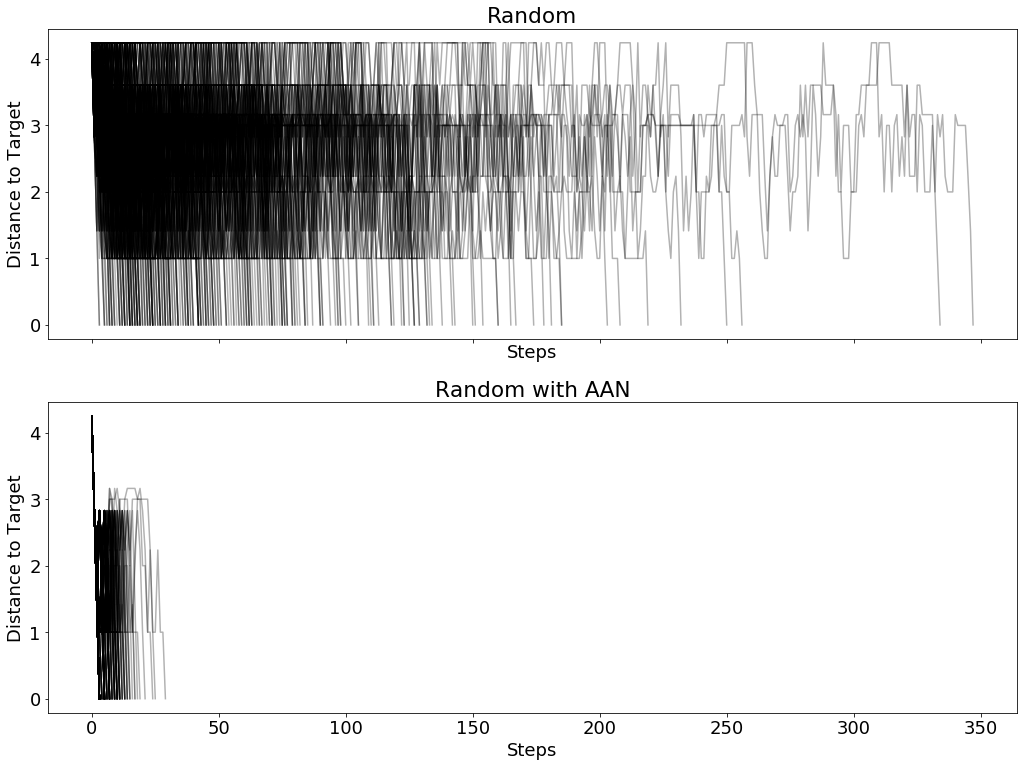

In [51]:
fig, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False)
ax1.set_title("Random")
ax2.set_title("Random with AAN")
ax1.set_xlabel("Steps")
ax2.set_xlabel("Steps")
ax1.set_ylabel("Distance to Target")
ax2.set_ylabel("Distance to Target")
fig.tight_layout()

for j in range(len(rand_dict)):
    tempx=np.array([])
    tempy=np.array([])
    tempxy = rand_dict[str(j)]
    dis2Target = np.array([])
    for k in tempxy:
        tempx = np.append(tempx,k[0]) 
        tempy = np.append(tempy,k[1])
    dis2Target = np.sqrt((3-tempx)**2 + (3-tempy)**2)
    ax1.plot(dis2Target, 'k', alpha=0.3)
    
for l in range(len(rand_dict)):
    tempx_=np.array([])
    tempy_=np.array([])
    tempxy_ = AANrand_dict[str(l)]
    dis2Target_ = np.array([]) 
    for m in tempxy_:
        tempx_ = np.append(tempx_,m[0]) 
        tempy_ = np.append(tempy_,m[1])
#     print(type(tempx_))
    dis2Target_ = np.sqrt((3-tempx_)**2 + (3-tempy_)**2)
    ax2.plot(dis2Target_, 'k', alpha=0.3)

### The same Random Action with AAN

In [ ]:
o=0
table__AAN={}
action_AAN = np.array([])
num_episodes = 1
dim = data[2]
pos_goal = data[1]
pos_trap = data[3]
table = np.zeros(dim)
table[pos_goal[0],pos_goal[1]] = 0.35
table[pos_trap[0],pos_trap[1]] = 0.7
IterAction = iter(action_rand.astype(int))
for ep in range(num_episodes):
    data = env.reset()
    s_0 = data[0]
    done = False
    rewards = 0
    while done == False:
        # Random Action value
        # Assist As Needed ( Current GS, Action, Q weight, Angle_err weight, Q-table)
        #print()
        currentAction = next(IterAction)

        action = AAN(np.array(s_0), currentAction, 0.75, 1, q_table)

        action_AAN = np.append(action_AAN, np.array([action]))
        table[s_0[0], s_0[1]] = 1.0
        table__AAN[str(o)] = table.copy()
        o = o + 1
        if (s_0[0]==pos_trap[0] & s_0[1]==pos_trap[1]):
            table[s_0[0], s_0[1]] = 0.7
        else:
            table[s_0[0], s_0[1]] = 0.0
        s_1, reward, done = env.step(action)
        rewards += reward
        if done:
            table[pos_goal[0],pos_goal[1]]=1.0
            table__AAN[str(o)] = table.copy()
            ep_rewards.append(rewards)

# Animation part 
def update_frame(i):
    plt.clf()
    heatmap_data = table__AAN[str(i)] #+ table__rand[str(i)]
    ax = sns.heatmap(
        heatmap_data,
        annot=False,
        cmap='jet',
        linewidths=.05,
        fmt='')

fig = plt.figure()
data_min = np.nanmin(table__AAN.values)
data_max = np.nanmax(table__AAN.values)
data_frames_iterator = table__AAN.values()
# write animation frames
anim2 = animation.FuncAnimation(fig, update_frame, frames=len(table__AAN), interval=500)
# anim.save('test.gif', writer='imagemagick')
anim.save("C:\\Users\\Home\\Desktop\\Tor Browser\\AAN_.gif", writer='convert', fps=60)
HTML(anim2.to_html5_video())


In [ ]:
table__temp =table__rand['1'].copy()
idx = np.argwhere(table__AAN['1']==1.0).flatten()
table__temp[idx[0], idx[1]] = 0.58
# np.argwhere(table__AAN['1']==1.0)
table__temp

In [ ]:
len(table__rand)

In [ ]:

for i in range(len(table__rand)):
    print(table__rand[str(i)])

In [ ]:
def update_frame(i):
    plt.clf()
    table__temp =table__rand[str(i)].copy()
    if (str(i) in table__rand) & (str(i) in table__AAN):
        if (np.argwhere(table__temp==1.0).all() != np.argwhere(table__AAN[str(i)]==1.0).all()):
            idx = np.argwhere(table__AAN[str(i)]==1.0).flatten()
            table__temp[idx[0], idx[1]] = 0.55
    else:
        if(i!=len(table__rand)-1):
            table__temp[pos_goal[0],pos_goal[1]] = 0.55
#     print(table__temp)
    heatmap_data = table__temp
    ax = sns.heatmap(
        heatmap_data,
        annot=False,
        cmap='jet',
        linewidths=.05,
        fmt='')

fig = plt.figure()
data_min = np.nanmin(table__rand.values)
data_max = np.nanmax(table__rand.values)
data_frames_iterator = table__rand.values()
# write animation frames
anim = animation.FuncAnimation(fig, update_frame, frames=len(table__rand), interval=1000)
# anim.save('test.gif', writer='imagemagick')
HTML(anim.to_html5_video())

In [ ]:
action_AAN

In [ ]:
action_rand

In [ ]:
HTML(anim.to_html5_video())
HTML(anim2.to_html5_video())

In [ ]:
action_AAN

In [ ]:
action_rand

### Just the Display animation Part

In [ ]:
def update_frame(i):
    plt.clf()
    heatmap_data = table__[str(i)]
    ax = sns.heatmap(
        heatmap_data,
        annot=False,
        cmap='jet',
        linewidths=.05,
        fmt='')

fig = plt.figure()
data_min = np.nanmin(table__.values)
data_max = np.nanmax(table__.values)
data_frames_iterator = table__.values()
# write animation frames
anim = animation.FuncAnimation(fig, update_frame, frames=len(table__), interval=100)
# anim.save('test.gif', writer='imagemagick')
HTML(anim.to_html5_video())

##### Linearly weighted
S = (w1 * F1) + (w2 * F2) + (w3 * F3)
    
    
    Fx_n = Fx / Fmax

##### Estimated True Value (ETV) 
S = (F2 / F2_max * F1) + ((1 - (F2 / F2_max)) * F1_avg)

#### Psuedo Algorithm:
1. Generate random action (0-7)
2. Assume a Game State GS (within (10,10))
3. Get the Q values for the current GS
4. Normalise Qvalues by Cummulative Histogram
5. Normalise angle error
6. Linearly weighted for sorting → Q-value Vs Angle error between Actions (Competence Vs Autonomy) 
7. Weighted Value = (a1 * Norm_Q) - (a2 * Norm_ang)  
   (.75 * Norm_Q) - (1 * Norm_ang)
8. Max of Weighted Value is the optimised action using the above equation. 


In [ ]:
au = randint(0,7)
Norm_Q = np.array([])
print("Action Number:",au)

##### Assumed Game State (GS)###########
s_0 = [0,0]  

#### Get the Qvalues of the given GS ###
Qs0 = q_table[s_0[0]][s_0[1]]   

arl = np.argmax(Qs0)
Qu = Qs0[au]
Qu_Qrl = abs(Qs0-Qu)
########Normalise All QValues #########
q_flat = q_table.flatten()
q_flat = np.around(q_flat, decimals=3)
values, base = np.histogram(q_flat, bins=100000)
base = np.around(base, decimals=1)
cumulative = np.cumsum(values)
cumulative = cumulative/np.max(cumulative)

########Get Normalised QValues ########
for qv_ in Qs0:
    idx = base.tolist().index(round(qv_,1))
    Norm_Q = np.append(Norm_Q,np.array([cumulative[idx]]))
#     print(cumulative[idx])

#################Normalise Angle#######
ANu = au
ANrl = deque([0,1,2,3,4,-3,-2,-1])
ANrl.rotate(au)
ANu_ANrl = np.array(ANrl)
print("Angle-angle user:", ANu_ANrl)
Norm_ang = map_(abs(ANu_ANrl), 0.0, 4.0, 0.0, 1.0)
########Weighted Q & Angle Error #######
WeightedNorm = (.75 * Norm_Q) - (1 * Norm_ang)
###########Plot Angle Vs Q#############
Weighted_ComptVsSOA = np.argmax(WeightedNorm)
print("Weighted_ComptVsSOA:",Weighted_ComptVsSOA)
ANu_ANrl = ANu_ANrl*45
plt.plot(ANu_ANrl,Qs0,'*')
plt.axvspan(ANu_ANrl[ANu], ANu_ANrl[ANu], color='red', alpha=0.5)
plt.axvspan(ANu_ANrl[Weighted_ComptVsSOA], ANu_ANrl[Weighted_ComptVsSOA], color='green', alpha=0.5)
plt.xlabel("Angle Error")
plt.ylabel("Q")
print("Normalised Angle", Norm_ang)
print("Normalised Q value", Norm_Q)
print("(.75xNorm Q)-(1xNorm Angle)", WeightedNorm)


In [ ]:
au = randint(0,7)
Norm_Q = np.array([])
print("Action Number:",au)

##### Assumed Game State (GS)###########
s_0 = [1,1]  

#### Get the Qvalues of the given GS ###
Qs0 = q_table[s_0[0]][s_0[1]]   

arl = np.argmax(Qs0)
Qu = Qs0[au]
Qu_Qrl = abs(Qs0-Qu)
########Normalise All QValues #########
q_flat = q_table.flatten()
q_flat = np.around(q_flat, decimals=3)
values, base = np.histogram(q_flat, bins=100000)
base = np.around(base, decimals=1)
cumulative = np.cumsum(values)
cumulative = cumulative/np.max(cumulative)

########Get Normalised QValues ########
for qv_ in Qs0:
    idx = base.tolist().index(round(qv_,1))
    Norm_Q = np.append(Norm_Q,np.array([cumulative[idx]]))
#     print(cumulative[idx])

#################Normalise Angle#######
ANu = au
ANrl = deque([0,1,2,3,4,-3,-2,-1])
ANrl.rotate(au)
ANu_ANrl = np.array(ANrl)
print("Angle - angle user", ANu_ANrl)
Norm_ang = map_(abs(ANu_ANrl), 0.0, 4.0, 0.0, 1.0)
########Weighted Competence+SOA #######
WeightedNorm = (1 * Norm_Q) - (.75 * Norm_ang)
###########Plot Angle Vs Q#############
Weighted_ComptVsSOA = np.argmax(WeightedNorm)
print("Weighted_ComptVsSOA",Weighted_ComptVsSOA)
ANu_ANrl = ANu_ANrl*45
plt.plot(ANu_ANrl,Qs0,'*')
plt.axvspan(ANu_ANrl[ANu], ANu_ANrl[ANu], color='red', alpha=0.5)
plt.axvspan(ANu_ANrl[Weighted_ComptVsSOA], ANu_ANrl[Weighted_ComptVsSOA], color='green', alpha=0.5)
plt.xlabel("Angle Error")
plt.ylabel("Q")
print("Normalised Angle", Norm_ang)
print("Normalised Q value", Norm_Q)
print("(1xNorm Q)-(0.75xNorm Angle)", WeightedNorm)


In [ ]:
q_flat = q_table.flatten()
q_flat = np.around(q_flat, decimals=3)
qshape = int(q_flat.shape[0])
values, base = np.histogram(q_flat, bins=100000)
base = np.around(base, decimals=1)
cumulative = np.cumsum(values)/qshape
# plot the cumulative function
plt.plot(base[:-1], cumulative, c='blue')
plt.xlabel("Qvalue")
plt.ylabel("Frequency")
#plot the survival function
# plt.plot(base[:-1], len(q_flat)-cumulative, c='green')
# ["foo", "bar", "baz"].index("bar")
plt.show()